In [126]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [127]:
curr_dir = os.getcwd()
file_path = 'test.dat'
path = os.path.join(curr_dir, file_path)
with open(path, 'rb') as f:
    fhr_signal = np.fromfile(f, dtype=np.float64)

In [128]:
baseline = np.mean(fhr_signal)
print(baseline)

142.85244575561478


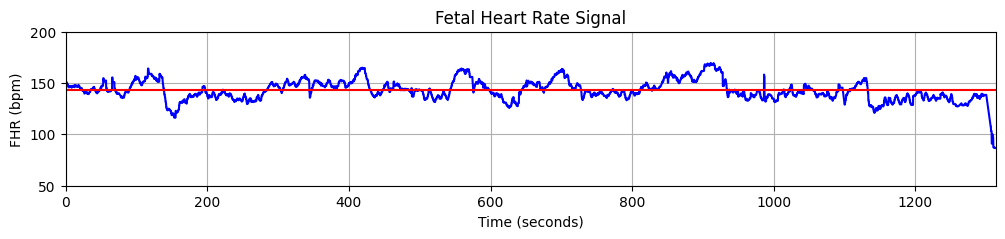

In [129]:
sampling_rate = 4
time = np.arange(len(fhr_signal)) / sampling_rate
plt.figure(figsize=(12, 2))
plt.plot(time, fhr_signal, color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('FHR (bpm)')
plt.title('Fetal Heart Rate Signal')
plt.grid(True)
plt.axhline(y=baseline, color='red', label='Baseline')
plt.ylim(50, 200)
plt.xlim(time[0], time[-1])
plt.show()

In [130]:
current_segment = []
segments_above_baseline = []
segments_below_baseline = []
above_baseline = fhr_signal[0] > baseline

for value in fhr_signal:
    is_above_baseline = value > baseline
    
    if is_above_baseline != above_baseline:
        if above_baseline:
            segments_above_baseline.append(current_segment)
        else:
            segments_below_baseline.append(current_segment)
            
        current_segment = [value]
        above_baseline = is_above_baseline
    else:
        current_segment.append(value)
        
if above_baseline:
    segments_above_baseline.append(current_segment)
else:
    segments_below_baseline.append(current_segment)

In [135]:
window_size = 15
prolonged_window_size = 120
threshold_bpm = 15

In [136]:
num_accelerations = 0

for segment in segments_above_baseline:
    max_signal = np.max(segment)
    
    if len(segment) / 4 >= window_size and max_signal >= baseline + threshold_bpm:
        num_accelerations += 1

AC = num_accelerations / len(time)
print(AC)

0.0011419870574800152


In [139]:
num_decelerations = 0
num_prolonged_decelerations = 0

for segment in segments_below_baseline:
    min_signal = np.min(segment)
    
    if len(segment) / 4 >= window_size and min_signal <= baseline - threshold_bpm:
        num_decelerations += 1
        if len(segment) / 4 >= prolonged_window_size:
            num_prolonged_decelerations += 1

DC = num_decelerations / len(time)
DP = num_prolonged_decelerations / len(time)
print(DC)
print(DP)

0.0005709935287400076
0.00019033117624666921


In [155]:
segment_length = 60 * sampling_rate

stv_values = []
for i in range(0, len(fhr_signal), segment_length):
    segment = fhr_signal[i:i+segment_length_samples]
    max_signal = np.max(segment)
    min_signal = np.min(segment)
    
    stv = max_signal - min_signal
    stv_values.append(stv)

MSTV = np.mean(stv_values)
print(MSTV)

23.988636363636363


In [156]:
segment_length = 300 * sampling_rate

ltv_values = []
for i in range(0, len(fhr_signal), segment_length):
    segment = fhr_signal[i:i+segment_length_samples]
    max_signal = np.max(segment)
    min_signal = np.min(segment)
    
    ltv = max_signal - min_signal
    ltv_values.append(ltv)

MLTV = np.mean(ltv_values)
print(MLTV)

22.7
